# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Group Operations

### Exercise 13: GroupBy

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the cars dataset (cars.csv).

In [2]:
import pandas as pd
cars = pd.read_csv("cars.csv")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


__Calculate__ the mean/average mpg __by origin__ (mean mpg for usa, for europe and for japan)! Who built the __least__ fuel efficient cars?

In [3]:
cars.groupby("origin").mpg.mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

__Calculate__ the mean/average mpg __by model_year__ (mean mpg for the years 70, 71, ...). Can you see a __trend__? __Visualize__!

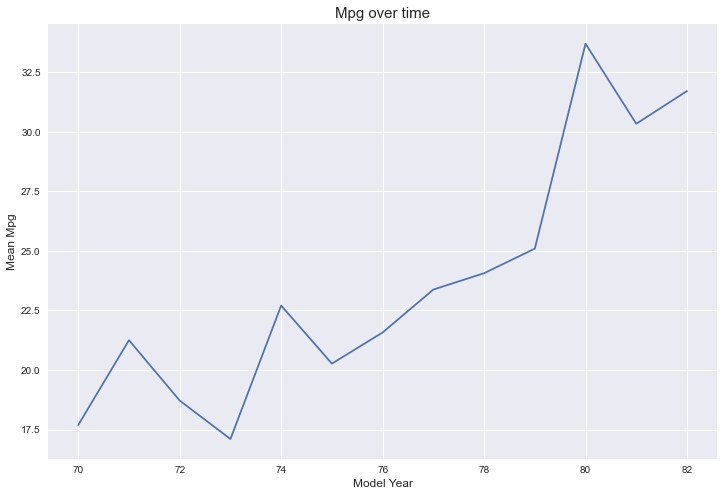

In [11]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
cars.groupby("model_year").mpg.mean().plot(figsize=(12,8))
plt.xlabel("Model Year", fontsize = 12)
plt.ylabel("Mean Mpg", fontsize = 12)
plt.title("Mpg over time", fontsize = 15)
plt.show()

__Calculate__ the mean/average mpg for each __combination of model_year & origin__ and __visualize__ how the mean mpg evolved over time for usa, europe and japan. <br>
Can you see the __same trend__ for all three orgins?

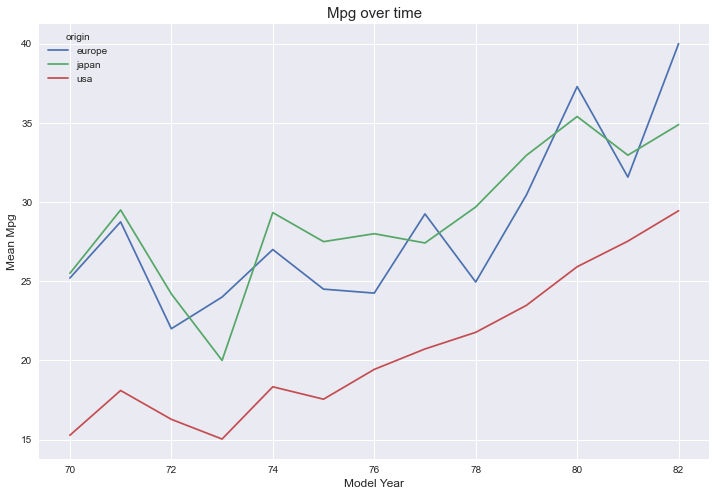

In [26]:
mpg_year_origin = cars.groupby(["model_year","origin"]).mpg.mean().unstack()
mpg_year_origin.plot(figsize = (12,8))
plt.xlabel("Model Year", fontsize = 12)
plt.ylabel("Mean Mpg", fontsize = 12)
plt.title("Mpg over time", fontsize = 15)
plt.show()

Calculate the __mean__, __min__ and __max__ mpg for each combination of model_year & origin!

In [35]:
mpg_year_origin = cars.groupby(["model_year","origin"]).mpg.agg(["mean", "min", "max"])
mpg_year_origin

mean   min   max
model_year origin                       
70         europe  25.200000  24.0  26.0
           japan   25.500000  24.0  27.0
           usa     15.272727   9.0  22.0
71         europe  28.750000  27.0  30.0
           japan   29.500000  25.0  35.0
           usa     18.100000  12.0  28.0
72         europe  22.000000  18.0  26.0
           japan   24.200000  19.0  28.0
           usa     16.277778  11.0  28.0
73         europe  24.000000  19.0  29.0
           japan   20.000000  18.0  22.0
           usa     15.034483  11.0  23.0
74         europe  27.000000  24.0  31.0
           japan   29.333333  24.0  32.0
           usa     18.333333  13.0  28.0
75         europe  24.500000  22.0  29.0
           japan   27.500000  24.0  33.0
           usa     17.550000  13.0  23.0
76         europe  24.250000  16.5  29.5
           japan   28.000000  19.0  33.0
           usa     19.431818  13.0  29.0
77         europe  29.250000  21.5  36.0
           japan   27.416667  21.5  33.5
           usa     20.722222  15.0  33.5
78         europe  24.950000  16.2  43.1
           japan   29.687500  21.1  39.4
           usa     21.772727  17.5  36.1
79         europe  30.450000  25.4  37.3
           japan   32.950000  31.8  34.1
           usa     23.478261  15.5  35.7
80         europe  37.288889  29.8  44.3
           japan   35.400000  23.7  46.6
           usa     25.914286  19.1  32.1
81         europe  31.575000  28.1  34.5
           japan   32.958333  24.2  39.1
           usa     27.530769  17.6  39.0
82         europe  40.000000  36.0  44.0
           japan   34.888889  31.0  38.0
           usa     29.450000  22.0  38.0

Return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__! <br>(hint: a __user defined function__ might help!)

In [37]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [42]:
def get_most_efficient(group):
    return group.nlargest(n = 2, columns = "mpg").loc[:, ["name", "mpg"]]

In [43]:
most_eff = cars.groupby(["model_year","origin"]).apply(get_most_efficient)

In [44]:
most_eff

name   mpg
model_year origin                                             
70         europe 19                vw 1131 deluxe sedan  26.0
                  23                            bmw 2002  26.0
           japan  18                        datsun pl510  27.0
                  14               toyota corona mark ii  24.0
           usa    15                     plymouth duster  22.0
...                                                  ...   ...
82         europe 375                        vw rabbit l  36.0
           japan  383                        honda civic  38.0
                  385                      datsun 310 gx  38.0
           usa    378             plymouth horizon miser  38.0
                  387  oldsmobile cutlass ciera (diesel)  38.0

[78 rows x 2 columns]

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!).<br>
Then, __filter__ all cars, where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars are outliers/special cases in their respective group.

In [48]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,best_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,<bound method Series.transform of model_year ...
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,<bound method Series.transform of model_year ...
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,<bound method Series.transform of model_year ...
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,<bound method Series.transform of model_year ...
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,<bound method Series.transform of model_year ...
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,<bound method Series.transform of model_year ...
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,<bound method Series.transform of model_year ...
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,<bound method Series.transform of model_year ...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,<bound method Series.transform of model_year ...


In [53]:
cars.drop(labels = "best_mpg", axis = 1, inplace = True)

In [57]:
cars["group_mean_mpg"] = cars.groupby(["model_year", "origin"]).mpg.transform("mean")

In [59]:
cars["outliers"] = (cars.mpg - cars.group_mean_mpg).round(2)

In [60]:
cars.outliers.describe()

count    398.000000
mean       0.000729
std        4.555381
min      -11.700000
25%       -3.220000
50%       -0.885000
75%        2.730000
max       18.150000
Name: outliers, dtype: float64

In [62]:
cars.loc[cars.outliers.abs() > 10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_mean_mpg,outliers
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw),16.277778,11.72
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m,20.722222,12.78
244,43.1,4,90.0,48.0,1985,21.5,78,europe,vw rabbit custom diesel,24.950000,18.15
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta,21.772727,14.33
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom,23.478261,12.22
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon,23.478261,10.72
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,23.478261,11.02
308,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,23.478261,10.02
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,35.400000,11.20
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,35.400000,-11.70


------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#run the cell
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#run the cell
cars = pd.read_csv("cars.csv")

In [ ]:
#run the cell
cars.head()

In [ ]:
#run the cell
cars.tail()

In [ ]:
#run the cell
cars.info()

117. __Group__ cars by the column __origin__ and __calculate__ the __mean__/average __mpg__ for each origin (mean mpg for usa, for europe and for japan)! <br>
Who built the __least__ fuel efficient cars?

The least fuel efficient cars are from ... usa.

118. __Group__ cars by the column __model_year__ and __calculate__ the __mean__/average __mpg__ for each model_year (mean mpg for 70, 71, 72,...)! <br>__Save__ the result in the variable __mpg_by_year__ and __round__ to two decimals!

In [ ]:
# run the cell
mpg_by_year

__Inspect__! Can you see a __trend__?

In [ ]:
# run the cell!
mpg_by_year.plot()
plt.show()

The cars are getting ... more fuel efficient over time.

119. __Group__ cars by the columns __model_year and origin__ and return the __mean mpg__ for each group! <br> __Save__ the resulting DataFrame in the variable __mpg_year_origin__!
__Column labels__ of mpg_year_origin shall be __europe__, __japan__ & __usa__. __Fill in the gaps__! 

In [ ]:
mpg_year_origin = cars.groupby(---).mpg.mean().---.round(2)

In [ ]:
# run the cell
mpg_year_origin

__Inspect__! Do we have the __same trend__ for europe, japan and usa?

In [ ]:
# run the cell
mpg_year_origin.plot()
plt.show()

It seems that manufacturer from europe, japan and usa were able to improve efficiency!

120. __Group__ cars by __model_year and origin__ and return __mean__, __max__ and __min mpg__ for all groups! __Fill in the gaps!__

In [ ]:
cars.groupby(["model_year", "origin"]).mpg.---(---).unstack().round(2)

Next, return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__!

121. First, __create__ the __user defined function__ get_most_efficient! __Fill in the gaps!__ 

In [ ]:
def get_most_efficient(group):
    return group.---(n = ---, columns = "mpg").loc[:, ["name", "mpg"]]

122. __Apply__ get_most_efficient on the appropriate __groupby object__! __Save__ the resulting DataFrame in the variable __most_eff__. __Fill in the gaps!__

In [ ]:
most_eff = cars.groupby([---, ---]).---(---)

Tidy up and __Inspect__!

In [ ]:
# run the cell
most_eff = most_eff.droplevel(-1)

In [ ]:
# run the cell
most_eff.head(10)

123. __Select__ the 2 most efficient cars from __japan__ in __1980__! __Fill in the gaps!__ The __most efficient__ car is...?

In [ ]:
most_eff.loc[---]

The most efficient car is... the mazda glc.

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!). Then, __filter__ all cars where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars all outliers/special cases in their respective group.

124. First, __group__ cars by __model_year & origin__ and calculate the __mean mpg__ for each group via the --- method to create the new column __"group_mpg"__. <br>
__Fill in the gaps!__

In [ ]:
cars["group_mpg"] = cars.groupby(["model_year", "origin"]).mpg.---(---).round(2)

__Inspect!__ The group-specific mpg for the vw pickup is ... ?

In [ ]:
# run the cell
cars.head()

In [ ]:
# run the cell
cars.tail()

The group-specific mpg for the vw pickup is... 40.0!

125. __Create__ the column __"mpg_outlier"__ by __substracting__ the __group_mpg__ column from the __mpg__ column. __Round__ to 2 decimals! 

In [ ]:
# run the cell
cars.mpg_outlier.describe()

126. __Filter__ cars for all cars/rows, where the __absolute value__ in the __mpg_outlier__ column is __greater than 10__! __Fill in the gaps!__<br>
There is only one car, that is __significantly less fuel efficient__ than it´s peer group. Which one?

In [ ]:
cars.loc[--- > 10]

The... mazda rx-7 gs is significantly less fuel efficient than it´s peer group (negative value in mpg_outlier column).

# Well Done!

-------------------

# Hints (Spolier!)

117. cars.groupby("---").---.mean()

118. mpg_by_year = cars.groupby("---").---.---.round(2)

119. Don´t forget unstack() method!


120. agg() method, unstack() method

121. nlargest() method; 

122. group cars by model_year & origin; pass get_most_efficient to the apply() method

123. outer index level: 80; inner index level: "japan"

124. transform() method

125. (_pandas series_ - _pandas series_).round()

126. abs() method